In [6]:
import pandas as pd

df = pd.read_csv('train.csv')


In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
cols = ['LotFrontage','LotArea','BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea','TotRmsAbvGrd',
        'GarageArea','OpenPorchSF']
df = df[cols+['YrSold','SalePrice']]
df = df.dropna()
train_raw = df[df.YrSold < 2010]
test_raw = df[df.YrSold >= 2010]

<font color='red'>Assignment:</font> Build a ML model to predict **SalePrice** with **GrLivArea** using **DecisionTreeRegressor**.

In [34]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 

X_train = pd.DataFrame(train_raw[cols])
Y_train = pd.DataFrame(train_raw['SalePrice'])

X_test= pd.DataFrame(test_raw[cols])
Y_test= pd.DataFrame(test_raw['SalePrice'])
print(X_train)
print(Y_train)
# fit the regressor with X and Y data
model=regressor.fit(X_train, Y_train)

print(df['GrLivArea'])
df['SalePrice']

#print(X_test)
#print(Y_test)

      LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            65.0     8450         706           0        150          856   
1            80.0     9600         978           0        284         1262   
2            68.0    11250         486           0        434          920   
3            60.0     9550         216           0        540          756   
4            84.0    14260         655           0        490         1145   
...           ...      ...         ...         ...        ...          ...   
1452         35.0     3675         547           0          0          547   
1453         90.0    17217           0           0       1140         1140   
1454         62.0     7500         410           0        811         1221   
1455         62.0     7917           0           0        953          953   
1459         75.0     9937         830         290        136         1256   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1201, dtype: int64

In [25]:
#Predict sale price based on cols
print(model.predict(X_test))

Y_pred = model.predict(X_test)

[112500. 297000. 167000. 139000. 135000. 123000. 178000.  52000. 174900.
 151000. 141000. 118000.  93000. 178000. 208300. 230500. 438780.  98000.
 153000. 238000. 238000. 259000. 149900. 139000. 167900. 127000. 139000.
 111000. 189000. 124000. 176000.  82000.  60000. 145000. 214000. 213250.
 135000. 197000. 137000. 110000. 123000.  98600. 133000. 367294. 130000.
 159895. 155000.  67000. 139000. 242000. 259000.  93200. 149000. 127500.
 164500.  84500. 159950. 147000. 157900. 140000. 155835.  75000.  91500.
 110000. 230500. 123000. 157000. 270000.  78000. 100000. 278000. 200000.
 107000. 173500. 180000. 625000. 129000.  95000. 263435. 178000.  75000.
 266000. 159950. 185850. 219210. 150500. 156000. 134900. 263435. 195000.
 155000. 501837. 128900. 190000. 153000. 183900. 110500. 224900. 124000.
 257000. 126175. 115000. 229456.  82000. 157900. 185850. 240000. 136000.
 149900. 120000. 235000. 154900. 130000. 148500. 248900. 179000. 105000.
 131500. 173500. 144000. 173000. 159500. 260000. 36

In [46]:
Y_pred.shape

(143, 1)

<font color='red'>Assignment:</font> Calculate train/test scores of this model.

In [33]:
#Calculate MSE, MAE AND R2 scores
from sklearn.metrics import mean_squared_error as mse
print("Mean_Squared_error",mse(Y_test, Y_pred))

from sklearn.metrics import r2_score as r2
print("R2 score",r2(Y_test, Y_pred))

print("Decision tree regressor score for train data is ", regressor.score(X_train,Y_train))
print("Decision tree regressor score for test data is ", regressor.score(X_test,Y_test))

Mean_Squared_error 1914559744.4895105
R2 score 0.7438407714002111
Decision tree regressor score for train data is  0.9999915967904449
Decision tree regressor score for test data is  0.7438407714002111


<font color='red'>Assignment:</font> Plot the predcited **price** against **GrLivArea**.

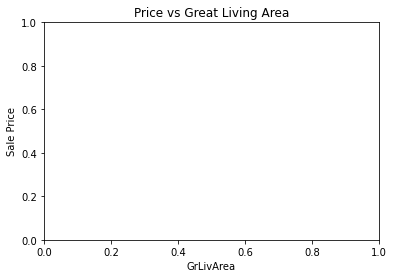

In [50]:
import matplotlib.pyplot as plt

df1= df['GrLivArea']
#plot y vs x
#plt.plot(df1, Y_pred)
 
#set title and x, y - axes labels
plt.title('Price vs Great Living Area')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
 
#show plot to user
plt.show()

In [39]:
#Performing the same calculations with linear regression model:

from sklearn.linear_model import LinearRegression

#Create a regressor object
lr=LinearRegression()

# fit the regressor with X and Y data
lr_model=lr.fit(X_train, Y_train)

print("Linear Regression score for train data is:,",model.score(X_train, Y_train))

print("Linear Regression score for test data is:,",model.score(X_test, Y_test))

Linear Regression score for train data is:, 0.6594735312826007
Linear Regression score for test data is:, 0.7580585046585805


In [38]:
#Predict sale price based on cols using linear regression
print(lr_model.predict(X_test))

Y_pred_lr = lr_model.predict(X_test)

[[134065.82449021]
 [257564.24876196]
 [213518.88548193]
 [129790.61990424]
 [238892.1973487 ]
 [105035.34338044]
 [173206.47806085]
 [ 83616.97390985]
 [143572.33479568]
 [162123.61060782]
 [169608.12813831]
 [ 90901.41731922]
 [106443.17190454]
 [178636.15756473]
 [185289.24479947]
 [244720.68109585]
 [349456.54124321]
 [ 77446.3180598 ]
 [191332.37729913]
 [217682.87655196]
 [228479.41521901]
 [216000.77648247]
 [198343.0891574 ]
 [145959.73289413]
 [156438.33472577]
 [122300.96690073]
 [138715.20076325]
 [ 99702.992635  ]
 [187886.72901245]
 [143125.25869951]
 [245762.60944256]
 [ 98181.6231909 ]
 [163513.54772979]
 [115200.65523573]
 [258580.54515431]
 [202874.79374461]
 [107294.81059951]
 [270128.64188325]
 [192948.54554773]
 [114302.91777764]
 [103003.41135196]
 [149299.15000881]
 [ 95762.54615138]
 [282743.02069942]
 [173616.66767315]
 [162624.74130979]
 [173620.09861828]
 [128026.58425795]
 [137664.37274393]
 [215879.37148681]
 [229408.62504043]
 [ 76691.52309438]
 [150480.324

In [42]:
#Calculate MSE,MAE  AND R2 scores for linear regression
from sklearn.metrics import mean_squared_error as mse
print("Mean_Squared_error",mse(Y_test, Y_pred_lr))

from sklearn.metrics import mean_absolute_error as mae
print("Mean_Absolute_error",mae(Y_test, Y_pred_lr))

from sklearn.metrics import r2_score as r2
print("R2 score",r2(Y_test, Y_pred_lr))


Mean_Squared_error 1808294981.3452866
Mean_Absolute_error 28045.43762959793
R2 score 0.7580585046585805


<font color='red'>Question:</font> Does the decision tree model perform better than the linear regression model? Why?

<font color='red'>Question:</font> How does decision tree work? How is branch split?

A decision tree makes decisions by splitting nodes into sub-nodes. This process is performed multiple times during the training process until only homogenous nodes are left. And it is the only reason why a decision tree can perform so well. 

<font color='red'>Assignment:</font> Build a decision-tree model to predict **price** with features in **cols**.

In [11]:
#
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
#clf.predict([[3750]])


In [12]:
#Decision tree plot
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_9 <= 1393.50
|   |--- feature_5 <= 1067.00
|   |   |--- feature_9 <= 692.00
|   |   |   |--- feature_4 <= 96.00
|   |   |   |   |--- feature_9 <= 386.00
|   |   |   |   |   |--- class: 39300
|   |   |   |   |--- feature_9 >  386.00
|   |   |   |   |   |--- feature_9 <= 527.00
|   |   |   |   |   |   |--- class: 60000
|   |   |   |   |   |--- feature_9 >  527.00
|   |   |   |   |   |   |--- feature_1 <= 1734.50
|   |   |   |   |   |   |   |--- class: 92000
|   |   |   |   |   |   |--- feature_1 >  1734.50
|   |   |   |   |   |   |   |--- feature_10 <= 3.50
|   |   |   |   |   |   |   |   |--- class: 84500
|   |   |   |   |   |   |   |--- feature_10 >  3.50
|   |   |   |   |   |   |   |   |--- class: 89000
|   |   |   |--- feature_4 >  96.00
|   |   |   |   |--- feature_1 <= 9219.00
|   |   |   |   |   |--- feature_5 <= 524.00
|   |   |   |   |   |   |--- feature_6 <= 500.00
|   |   |   |   |   |   |   |--- class: 35311
|   |   |   |   |   |   |--- feature_6 >  500.00
|   | 

In [51]:
#Feature importance
display(clf.feature_importances_)

array([0.09410282, 0.11407866, 0.06896828, 0.02189999, 0.0938427 ,
       0.1191249 , 0.11187788, 0.05077267, 0.00504257, 0.0811329 ,
       0.06256844, 0.10533233, 0.07125586])

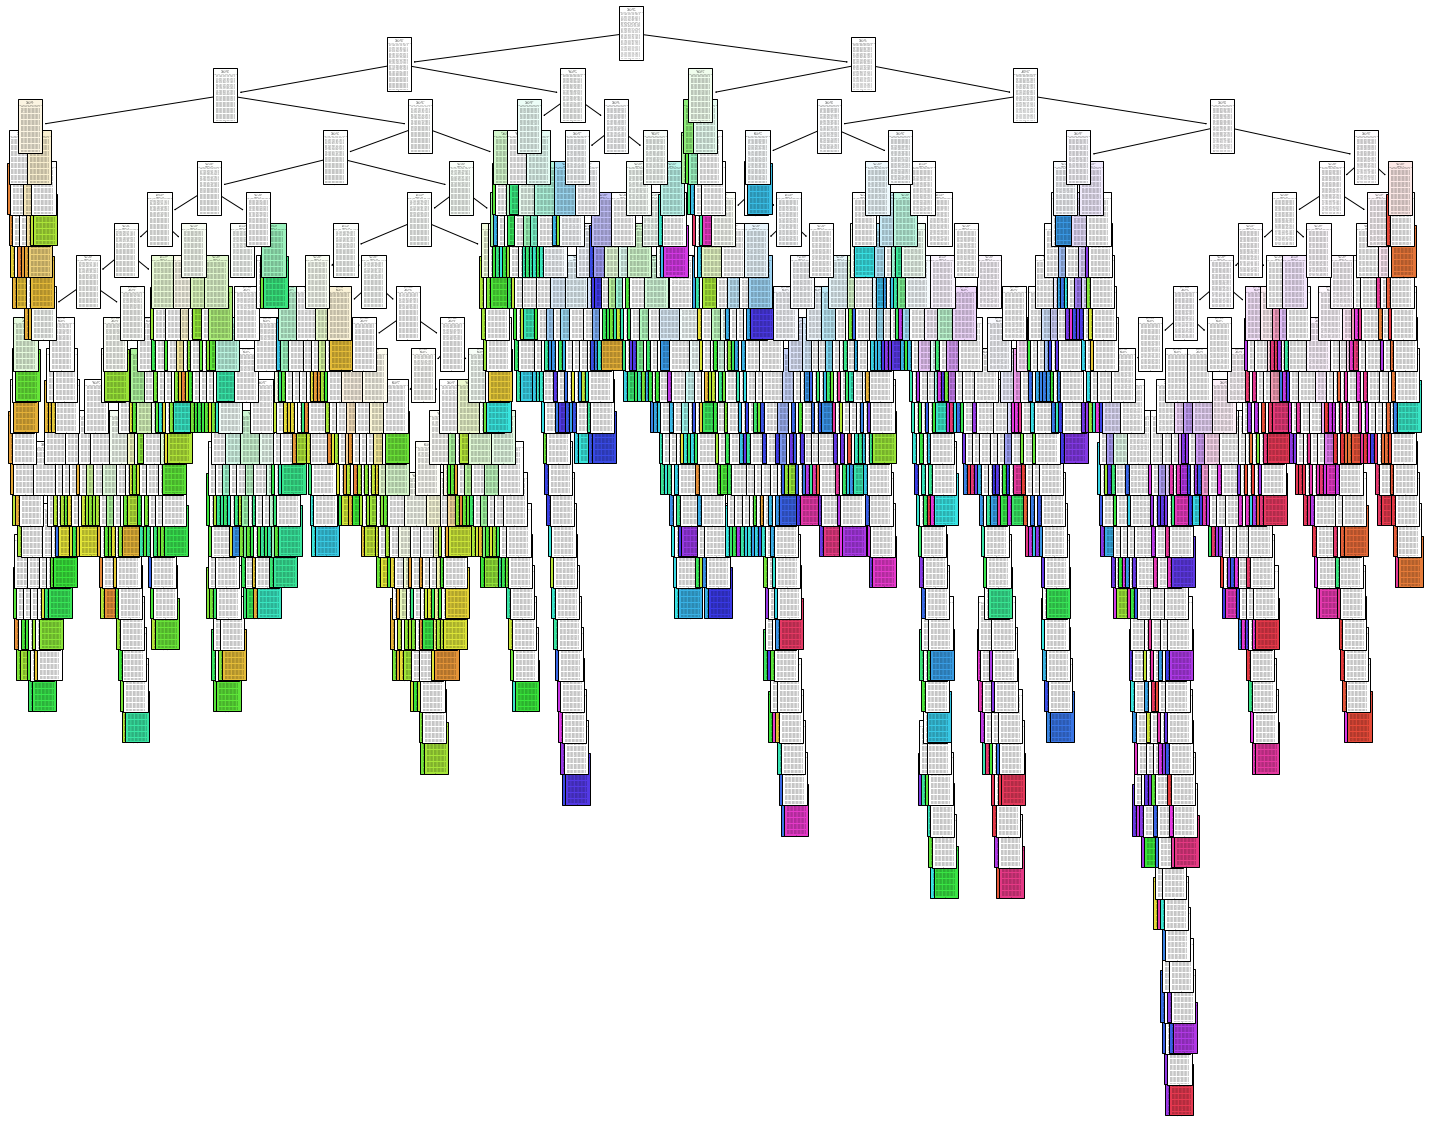

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,filled=True)

[Text(0.4398207197149541, 0.9857142857142858, 'X[9] <= 1393.5\ngini = 0.997\nsamples = 1058\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1\n1, 1, 1, 1, 3, 1, 2, 1, 1, 3, 3, 2, 1, 3\n3, 1, 1, 3, 4, 2, 1, 1, 1, 3, 1, 3, 1, 2\n1, 1, 3, 2, 1, 1, 2, 1, 3, 3, 1, 1, 1, 7\n1, 1, 3, 1, 1, 1, 1, 1, 5, 1, 3, 1, 1, 1\n2, 1, 5, 1, 1, 1, 1, 1, 4, 2, 9, 2, 1, 3\n2, 5, 2, 1, 7, 3, 1, 4, 2, 6, 1, 4, 1, 1\n5, 1, 4, 1, 2, 7, 3, 1, 3, 1, 1, 4, 1, 1\n6, 4, 2, 8, 1, 3, 1, 1, 7, 5, 3, 2, 1, 5\n4, 4, 10, 2, 2, 1, 2, 5, 1, 5, 5, 1, 1, 2\n3, 1, 1, 2, 1, 15, 2, 1, 3, 2, 1, 3, 1, 4\n1, 3, 1, 1, 8, 2, 1, 1, 15, 1, 5, 1, 2, 3\n1, 1, 6, 1, 1, 5, 1, 11, 1, 1, 1, 2, 1, 7\n1, 1, 3, 2, 2, 2, 3, 3, 1, 1, 1, 4, 1, 5\n2, 1, 3, 1, 2, 2, 1, 1, 11, 1, 1, 3, 1, 1\n5, 1, 1, 2, 1, 3, 1, 3, 1, 1, 8, 1, 1, 1\n2, 4, 1, 1, 2, 2, 1, 1, 1, 4, 1, 1, 1, 1\n4, 1, 2, 2, 1, 1, 1, 1, 1, 6, 3, 1, 1, 4\n1, 3, 1, 1, 1, 7, 1, 1, 8, 2, 2, 7, 1, 1\n2, 3, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1, 5, 6\n3, 5, 1, 1, 1, 1, 1, 1, 3, 1, 1, 7, 1, 1\n2, 1, 3, 1,

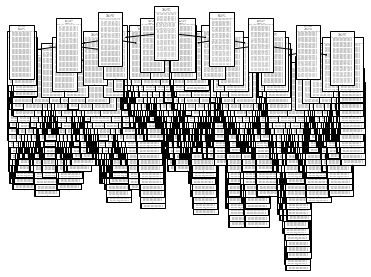

In [18]:
tree.plot_tree(clf)

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [52]:
#Train and test scores
print(clf.score(X_train,Y_train))

print(clf.score(X_test,Y_test))


0.997164461247637
0.0


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

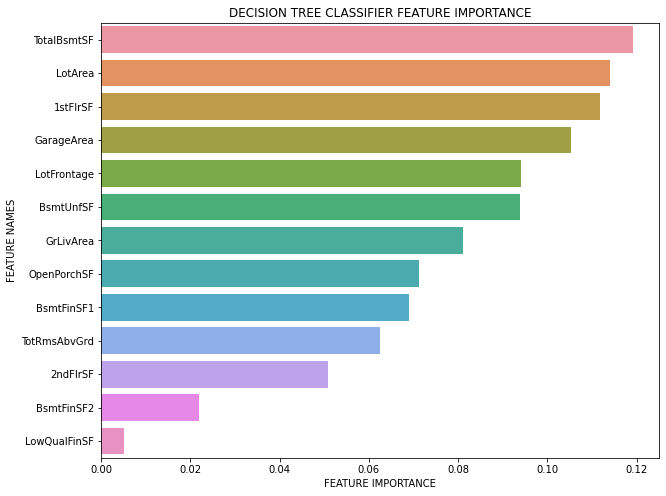

In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importance = clf.feature_importances_
names=cols

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

  
plot_feature_importance(importance,cols,'DECISION TREE CLASSIFIER ')


<font color='red'>Question:</font> How the feature importance values are calculated?

<font color='red'>Question:</font> Do you see any problems with this model? Why is that?

<font color='red'>Assignment:</font> Tune hyperparameters to optimize model performance.

In [53]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

<font color='red'>Question:</font> What are the hyper parameters which can effetively affect model performance? How do they affect the performance respectively?

max_features
max_leaf_nodes
Min_impurity_split
max_depth
min_impurity_decrease :It is set to zero by default.

Limit tree size (pick one, maybe two):
max_depth
max_leaf_nodes
min_samples_split
min_impurity_decrease

max_depth: int or None, optional (default=None)

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


splitter: string, optional (default=”best”)

The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.



min_samples_split: int, float, optional (default=2)

The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.




min_samples_leaf: int, float, optional (default=1)

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.


min_weight_fraction_leaf: float, optional (default=0.)

The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_features: int, float, string or None, optional (default=None)

The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.


random_state: int, RandomState instance or None, optional (default=None)

If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

class_weight: dict, list of dicts, “balanced” or None, default=None

The Decision tree complexity has a crucial effect on its accuracy .

Usually, the tree complexity is measured by one of the following metrics: the total number of nodes, total number of leaves, tree depth and number of attributes used [8]. max_depth, min_samples_split, and min_samples_leaf are all stopping criteria whereas min_weight_fraction_leaf and min_impurity_decrease are pruning methods.